* MIO-PARA REGRESIÓN TODO ES IGUAL EN CUANTO A PREPROCESAMIENTO, SELECCIÓN DE CARACTERISTICAS, AJUSTES Y SOBREAJUSTES.
* MIO- LO QUE CAMBIAN SON LAS MÉTRICAS.

In [3]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

pd.set_option("display.max_columns", 50)

In [4]:
# Symmetric mean absolute percentage error,https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error
def smape(y_true, y_pred):
    return ((100.0/len(y_true)) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))+ np.finfo(float).eps))

In [5]:
def mean_absolute_percentage_error(y_true, y_pred): 
    epsilon = 1e-10 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(epsilon,np.abs(y_true)))) * 100

In [6]:
# Relative root mean square error
def RRMSE (real, predicted):
  a = np.linalg.norm((real-predicted), ord='fro')
  b = np.linalg.norm(real, ord='fro')
  return(a/b)

# Cargamos el dataset

In [7]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

# EDA, Exploratory Data Analysis

## No NaNs

In [8]:
np.isnan(data.data).any()

False

## Histogramas

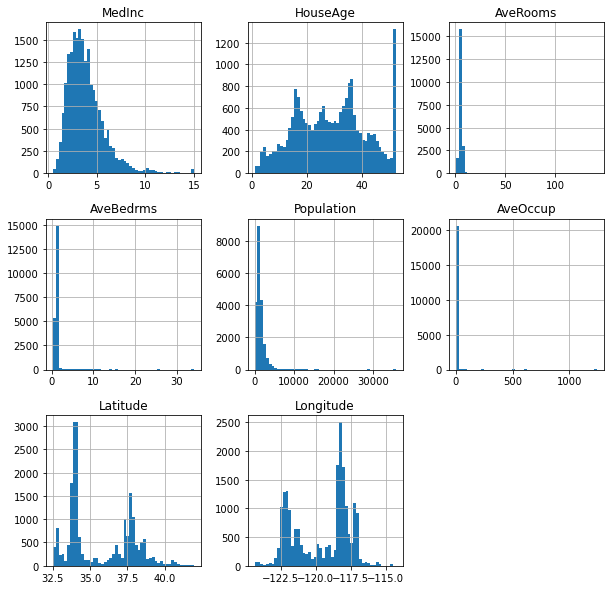

In [10]:
pd.DataFrame(data.data, columns=data.feature_names).hist(bins=50, figsize=(10, 10));

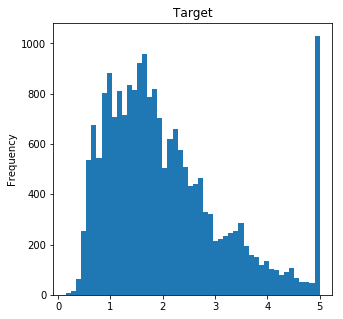

In [8]:
pd.Series(pd.Series(data.target)).plot.hist(bins=50, figsize=(5, 5), title='Target')

# Montamos los datasets X e y

In [9]:
dataset_X = data.data
dataset_y = data.target
print(dataset_X.shape, dataset_y.shape)
print(data.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14448, 8) (6192, 8) (14448,) (6192,)


# Modelo

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=123)

In [12]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

# Predicción, métricas

### Predicción de la primera muestra del conjunto de test

In [13]:
rf.predict(X_test[0:1,:])

array([ 0.48486])

### Devuelve el coeficiente $R^2$ de la predicción

In [14]:
rf.score(X_test, y_test)  # devuelve el coeficiente $R^2$ de la predicción. Cuando te acercas al 1 es mejor. -1 es malo. El 0 te devuleve la media.

0.80493364639560161

### Todas las metricas

In [15]:
y_test_hat = rf.predict(X_test)

In [16]:
print('Metricas de rendimiento de predicción')
results_table = pd.DataFrame(index=['MSE','MAE','MAD','R2','SMAPE', 'MAPE','RRMSE'],columns=['metricas'])
for i in range(1):
    results_table.iloc[0,i] = mean_squared_error( y_test, y_test_hat)
    results_table.iloc[1,i] = mean_absolute_error(   y_test, y_test_hat)
    results_table.iloc[2,i] = median_absolute_error(  y_test, y_test_hat)
    results_table.iloc[3,i] = r2_score( y_test, y_test_hat)
    results_table.iloc[4,i] = smape(  y_test, y_test_hat)
    results_table.iloc[5,i] = mean_absolute_percentage_error(  y_test, y_test_hat)## Porcentaje de error frente a tu valor de salida# Porcentaje de error frente a tu valor de salida.La relación entre el error abasoluto/erores absoluto de las variables-
    #MAPE POR DEBAJO DE 20% ES BUENO Y POR DEBAJO DEL 10% EXCELENTE
    results_table.iloc[6,i] = RRMSE( np.expand_dims(y_test, axis=1), np.expand_dims(y_test_hat, axis=1))
results_table

Metricas de rendimiento de predicción


,metricas
MSE,0.256032
MAE,0.33151
MAD,0.20917
R2,0.804934
SMAPE,16.7186
MAPE,19.0087
RRMSE,0.214111


# Regresión Cuantílica

La regresión cuantilica permite predecir un valor que no se corresponda con la media del valor esperado (lo que es habitual) sino con algún cuantil de dicho valor. Por ejemplo, si hacemos la predicción para el cuantil 95% obtendremos un valor tal que el 95% de los valores esté por debajo de él. Si el cuantil es el 50% obtendremos la mediana. De esta foirma podemos obtener tambien intervalos de confianza....


Podemos hacer regresión cuantílica con:
- statsmodels: con una perspectiva estadistica (https://www.statology.org/quantile-regression-in-python/)
- Tensorflow/Keras: usando la funcion de coste pinball.
- Gradient Boosting Regressor: usando scikit-learn o xgboost (veremos esta opción)

### Crear un modelo para cada predicción

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

clf_sup = GradientBoostingRegressor(loss='quantile', alpha=0.95)
clf_inf = GradientBoostingRegressor(loss='quantile', alpha=0.05)
clf_50 = GradientBoostingRegressor(loss='quantile', alpha=0.5)
clf_mean = GradientBoostingRegressor()  # Sacamos el valor de la media. por defecto la funcionde coste es: least square - ls. Esta es la función de coste de las redes neuronales cuando las usamos modalidad de regresión.

### Entrenar cada modelo

In [18]:
clf_sup.fit(X_train, y_train)
clf_inf.fit(X_train, y_train)
clf_50.fit(X_train, y_train)
clf_mean.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

### Predicciones en el conjunto de test

In [19]:
y_test_hat_sup = clf_sup.predict(X_test)
y_test_hat_inf = clf_inf.predict(X_test)
y_test_hat_50 = clf_50.predict(X_test)
y_test_hat_mean = clf_mean.predict(X_test)

### Comprobar las predicciones

In [20]:
print('Predicción cuantilica para varias muestras')

index_test_inf = 1
index_test_sup = 40
test_index = np.arange(index_test_inf,index_test_sup) # indice de las muestras del conjunto de test

pred_table = pd.DataFrame(index=['Q 95%','Mediana','Media','Real','Q 5%'],columns=test_index)
pred_table.iloc[0,:] = y_test_hat_sup[test_index]
pred_table.iloc[1,:] = y_test_hat_50[test_index]
pred_table.iloc[2,:] = y_test_hat_mean[test_index]
pred_table.iloc[3,:] = y_test[test_index]
pred_table.iloc[4,:] = y_test_hat_inf[test_index]

pred_table

Predicción cuantilica para varias muestras


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
Q 95%,2.409,5.58109,3.54751,3.18494,2.79776,3.41352,2.48536,4.95209,5.10037,1.74602,2.46806,1.97817,2.56116,3.20479,2.2805,3.28812,2.99835,2.54871,1.98637,5.18569,4.57328,2.99699,4.98431,2.34777,1.84704,2.79218,1.73023,2.31609,4.65049,2.21847,2.25667,3.62825,4.33523,2.79938,3.53399,3.9588,2.12603,1.69151,1.96059
Mediana,0.920376,3.4788,2.52511,2.14369,1.68273,2.40209,1.7505,2.77494,4.22393,0.939046,1.80096,1.67105,1.82224,2.35944,1.69478,2.21837,1.95091,1.68629,0.930259,3.16227,2.95461,1.6286,3.91491,1.71804,0.424459,1.9797,1.13083,1.45864,3.72022,1.14227,1.13776,2.33862,3.69065,2.30904,2.56562,3.01092,1.53957,0.908852,1.4621
Media,0.978304,4.04556,2.61149,2.26133,1.60433,2.4411,1.73953,3.00393,4.34219,0.882436,1.89526,1.61968,1.88456,2.27686,1.66019,2.17273,2.08299,1.64489,1.09605,3.52875,3.45852,1.38416,4.29279,1.61711,0.449411,2.08627,1.16878,1.56268,3.87533,1.36149,1.42175,2.32202,3.88674,2.33807,2.58774,3.17396,1.57186,1.02629,1.43241
Real,0.458,5.00001,2.186,2.78,1.587,1.982,1.575,3.4,4.466,1.232,2.539,2.151,2.205,2.198,1.362,1.784,1.875,1.398,1.375,4.25,4.056,1.388,5.00001,1.621,0.514,1.513,0.948,2.041,3.615,0.851,1.384,1.375,4.65,2.718,2.394,3.409,1.504,1.281,1.56
Q 5%,0.624492,1.26672,1.84757,1.29336,1.45242,1.58541,1.28291,1.61618,2.64462,0.648794,1.24783,1.19334,1.28229,1.72279,1.36371,1.27618,1.18528,1.17079,0.56382,1.60105,1.58199,1.22066,2.04507,1.32488,0.396526,1.15939,0.771252,1.20124,2.03585,0.901334,0.918006,1.095,2.45783,1.18615,1.78746,1.48356,1.23397,0.755322,1.08573


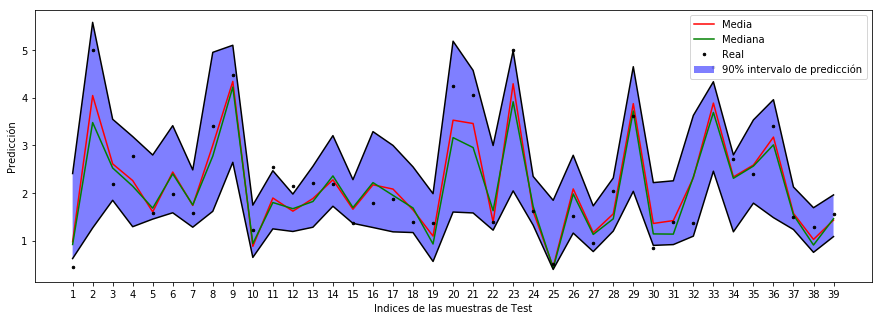

In [21]:
index_test_inf = 1
index_test_sup = 40
test_index = np.arange(index_test_inf,index_test_sup)

fig = plt.figure(figsize=(15,5))
plt.plot(test_index, y_test_hat_mean[test_index], 'r-', label=u'Media')
plt.plot(test_index, y_test_hat_50[test_index], 'g-', label=u'Mediana')
plt.plot(test_index, y_test[test_index], 'k.', markersize=5, label=u'Real')
plt.plot(test_index, y_test_hat_sup[test_index], 'k-')
plt.plot(test_index, y_test_hat_inf[test_index], 'k-')
plt.fill(np.concatenate([test_index, test_index[::-1]]),
         np.concatenate([y_test_hat_sup[test_index], y_test_hat_inf[test_index][::-1]]),
         alpha=.5, fc='b', ec='None', label='90% intervalo de predicción')
plt.xticks(test_index)
plt.xlabel('Indices de las muestras de Test')
plt.ylabel('Predicción')
plt.legend(loc='upper right')
plt.show()

### Porcentajes de error

#### Porcentaje en el que el valor real esta por encima de la prediccion cuantilica superior

In [22]:
np.mean(y_test > y_test_hat_sup)

0.072997416020671835

#### Porcentaje en el que el valor real esta por debajo de la prediccion cuantilica inferior

In [23]:
np.mean(y_test < y_test_hat_inf)

0.058785529715762272

#### Bastante ajustado a las predicciones !!!